<a href="https://colab.research.google.com/github/mwaura-k/Wk2core/blob/main/Moringa_School_10_21_Karen_Mwaura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

# **Define question.**

How can we predict which individuals are most likely to have or use bank accounts?


# **Metrics of success**

For this research to be successful we will require to implement methods to answer our main question. This includes performing univariate, bivariate and multivariate analysis and record the observations. Moreover, we will be required to implement the solutions using factor analysis, PCA and discriminant analysis. 

# **Context**

Financial Inclusion is one of the main obstacles to economic and human development in Africa. On an average, Kenya, Rwanda, Tanzania, and Uganda;13.9% persons are the only ones with access to commercial banks.The bank plays a pivotal role in facilitating access to financial services despite the rise of mobile money. We need to understand how many persons have a bank account in order to provide an indication of the state of financial inclusion in the countries mentioned above and provide insights into some of the key demographic factors that might drive individuals’ financial outcomes.


# **Experimental Design taken**

For the project to be implemented, we needed to find and deal with outliers, anomalies, and missing data within the dataset.
Perform univariate, bivariate and multivariate analysis recording your observations.
Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
Challenge your solution by providing insights on how you can make improvements.

## **Appropriateness of the data**

The dataset features several columns that will assist in answering the primary questions. Example of the columns are; Type of Location,age_of_respondent,Has a Bank account etc. The given columns and data provided will give answers to the main questions.

# **Read data**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset
df = pd.read_csv("http://bit.ly/FinancialDataset")
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [17]:
df.tail(5)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,No,Rural,Yes,10.0,20.0,Male,Single/Never Married,Secondary education,No Income


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [4]:
# number of rows and columns in our dataset
df.shape

(23524, 13)

In [5]:
# Getting the number of missing values
num_rows = df.shape[0]
num_missing = num_rows - df.count() 
num_missing

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [48]:
# Renaming columns
df.rename(columns = {'Has a Bank account':'Has_Bank_acc', 'Type of Location':'Location',
                              'Cell Phone Access':'Phones','Level of Educuation':'Education', 'Type of Job':'Jobs','Respondent Age':'Age'}, inplace = True)

In [39]:
df.describe

<bound method NDFrame.describe of       country  year  ...                        Education                       Jobs
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...       

In [86]:
# Converting datatypes
df["year"] = df["year"].astype(float)

In [8]:
# Dropping unnnecessary columns
column=["uniqueid", "The relathip with head"]
df.drop(column, axis = 1, inplace = True)

In [188]:
# Dropping all null values, along the rows. Wherever they are present
df = df.dropna(axis = 0, how ='any')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               18576 non-null  object 
 1   year                  18590 non-null  float64
 2   Has_Bank_acc          18554 non-null  object 
 3   Location              18575 non-null  object 
 4   Phones                18579 non-null  object 
 5   household_size        18563 non-null  float64
 6   Age                   18558 non-null  float64
 7   gender_of_respondent  18557 non-null  object 
 8   marital_status        18560 non-null  object 
 9   Education             18562 non-null  object 
 10  Jobs                  18561 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.7+ MB


In [10]:
# Check for duplicates
print(df.duplicated().sum())

4934


In [11]:
# Drop duplicates
df.drop_duplicates(inplace = True)

In [12]:
# Check for duplicates
print(df.duplicated().sum())

0


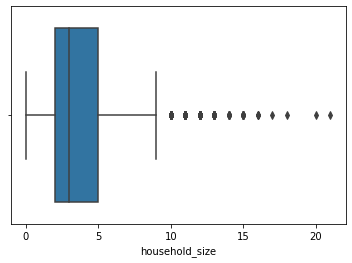

In [15]:
# Looking for outliers
sns.boxplot(x= df['household_size'])

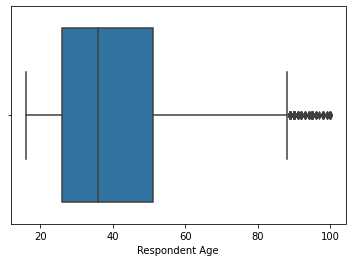

In [16]:
# Looking for outliers
sns.boxplot(x= df['Respondent Age'])

There are a couple of outliers from the first and second box plot; dealing with household size and the Age. 

# Univariate analysis


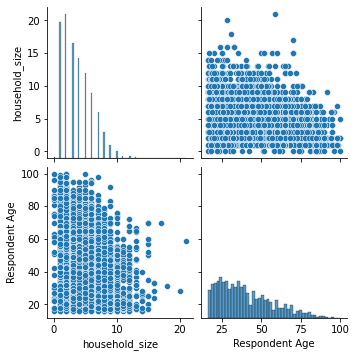

In [22]:
sns.pairplot(df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


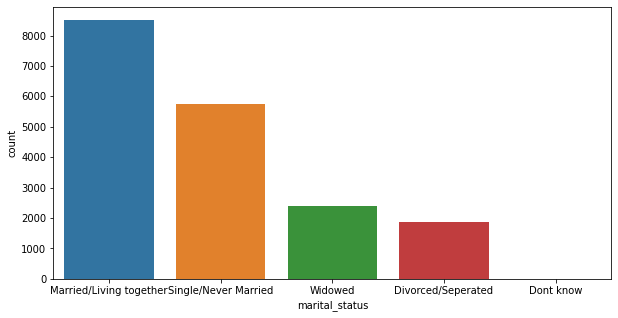

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(df.marital_status.dropna(), order = df.marital_status.value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


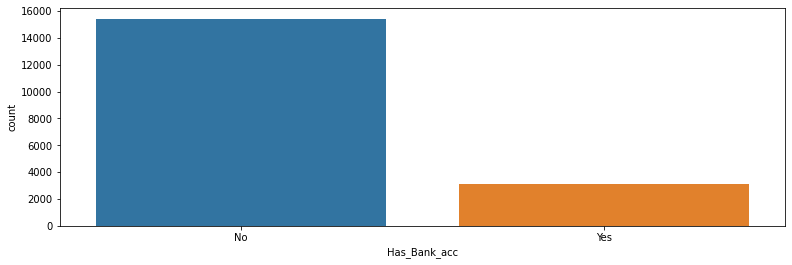

In [41]:
plt.figure(figsize=(13, 4))
sns.countplot(df.Has_Bank_acc .dropna(), order = df.Has_Bank_acc .value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


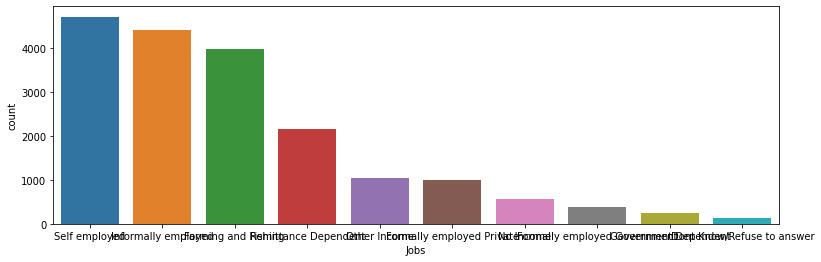

In [42]:
plt.figure(figsize=(13, 4))
sns.countplot(df.Jobs.dropna(), order = df.Jobs.value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


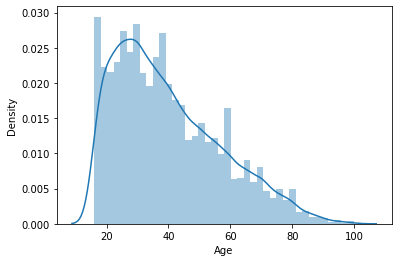

In [59]:
sns.distplot(df.Age .dropna(), kde=True, bins = 40);

In [62]:
# Finding the standard deviation
df["household_size"].std()

2.3709293319556246

In [63]:
df["household_size"].var()

5.621305897127543

In [64]:
df["Age"].var()

292.3219880291457

In [81]:
df["Age"].std()

17.097426356886164

In [66]:
df_max=df["Age"].max()
df_min=df["Age"].min()
# Calculating the range
df_max - df_min

84.0

In [67]:
df_max=df["household_size"].max()
df_min=df["household_size"].min()
# Calculating the range
df_max - df_min

21.0

In [77]:
# Find the quantiles of the ages
df["Age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    36.0
0.75    51.0
Name: Age, dtype: float64

In [69]:
# Find the quantiles of the Household size
df["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [70]:
# Determine skewness 
df["Age"].skew()

0.7533990523643365

In [71]:
# Determine kurtosis
df["Age"].kurt()

-0.12415466812643583

In [72]:
# Determine skewness 
df["household_size"].skew()

0.9715286323993002

In [73]:
# Determine Kurtosis
df["household_size"].kurt()

1.1152127354748314

In [74]:
df['Age'].describe()

count    18558.000000
mean        39.858444
std         17.097426
min         16.000000
25%         26.000000
50%         36.000000
75%         51.000000
max        100.000000
Name: Age, dtype: float64

In [75]:
df['household_size'].describe()

count    18563.000000
mean         3.750633
std          2.370929
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

# Bivariate analysis

The main purpose for bivariate analysis is to understand how two variables can interact with each other.

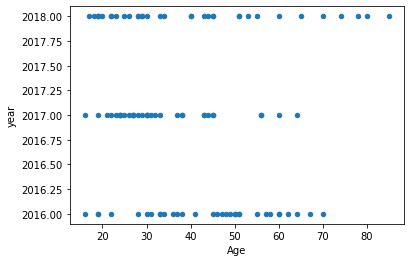

In [94]:
# Create scatter plots
df[df['Age'] < 100].sample(100).plot.scatter(x='Age', y='year')
plt.show()

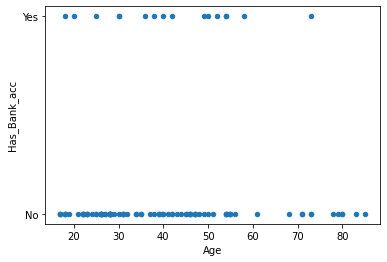

In [99]:
# Create scatter plots
df[df['Age'] < 100].sample(100).plot.scatter(x='Age', y='Has_Bank_acc')
plt.show()

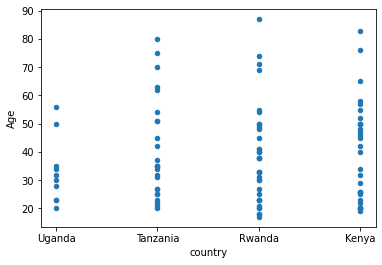

In [138]:
# Create scatter plots
df[df['Age'] < 100].sample(100).plot.scatter(x='country', y='Age')
plt.show()

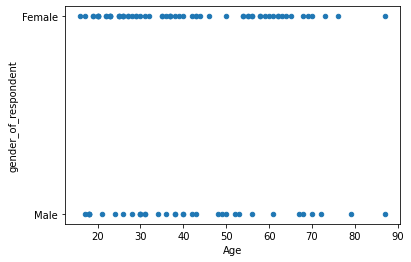

In [140]:
# Create scatter plots
df[df['Age'] < 100].sample(100).plot.scatter(x='Age', y='gender_of_respondent')
plt.show()

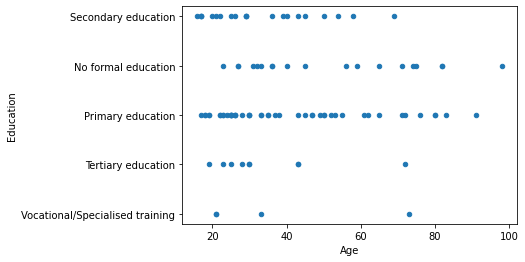

In [147]:
# Create scatter plots
df[df['Age'] < 100].sample(100).plot.scatter(x='Age', y='Education')
plt.show()

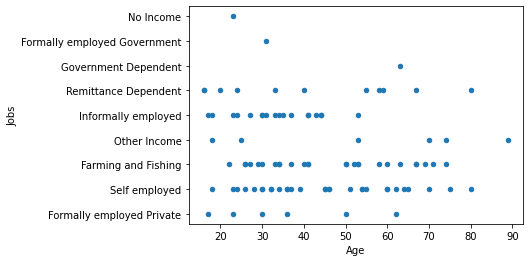

In [148]:
# Create scatter plots
df[df['Age'] < 100].sample(100).plot.scatter(x='Age', y='Jobs')
plt.show()

In [149]:
#  Calculate pearsons coefficient
df.corr()

,year,household_size,Age
year,1.000000,-0.025582,-0.038639
household_size,-0.025582,1.000000,-0.128515
Age,-0.038639,-0.128515,1.000000


In [151]:
# Calculate pearsons coefficient

df["Age"].corr(df["year"])

-0.03863905919475702

In [152]:
# Calculate pearsons coefficient

df["Age"].corr(df["household_size"])

-0.12851499303447425

In [153]:
# Calculate pearsons coefficient

df["year"].corr(df["household_size"])

-0.025582265026851035

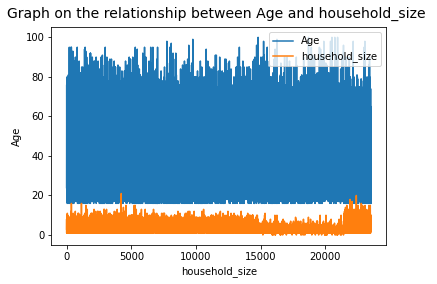

In [161]:
# Plotting our line graph
df[['Age','household_size']].plot.line()

# Title to the line graph
plt.title("Graph on the relationship between Age and household_size ", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Age')

# Labelling the x-axis
plt.xlabel('household_size')

# Displaying our graph
plt.show()

In the above charts, it is evident that, the majority age group between 20 -50 years have no bank accounts. The numbers have continued to change within the years 2016 and continued rising in 2018. Some of the factors that have influenced the majority of people from not having an account is; their level of education. There are also more females than male within the dataset, meaning the majority population(females) lack accounts.

# Multivariate

The goal of linear discriminant analysis is to project a dataset onto a lower-dimensional space

In [171]:
# divide dataset into features and corresponding labels 
X = df.iloc[:, 5:6].values
y = df.iloc[:, 5].values

In [172]:
# The code divides data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [173]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [187]:
# Perform LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

ValueError: ignored

In [185]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


ValueError: ignored